In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

# Question and answer

## Câu hỏi: Lượng giao dịch cổ phiếu của những người không thuộc công ty và người thuộc công ty là như thế nào?
+ Xem lượng mua cổ phiếu của người thuộc công ty và không thuộc công ty


### 1: Đọc file " data-csv/trading_statistics.csv "

In [11]:
df=pd.read_json('dataset/insider_actions.json',keep_default_dates=False)
df.head(10)

,date,shareholder,shareholder position,trading type,shares
0,05/09/2022,Nguyễn Thu Phương,None,Bán,359500
1,31/08/2022,Nguyễn Thu Phương,None,Bán,615800
2,29/06/2022,Nguyễn Thị Bổn,None,Bán,966100
3,20/06/2022,Nguyễn Thị Bổn,None,Đăng ký bán,966100
4,30/05/2022,Hồ Xuân Vinh,Thành viên HĐQT,Mua,100000
5,25/05/2022,Nguyễn Thị Thanh,Chủ tịch HĐQT,Mua,100000
6,05/05/2022,Hồ Xuân Vinh,Thành viên HĐQT,Đăng ký mua,100000
7,27/04/2022,Nguyễn Thị Thanh,Chủ tịch HĐQT,Đăng ký mua,100000
8,19/11/2021,CTCP Đầu tư Châu Á - Thái Bình Dương,None,Bán,1000000
9,02/11/2021,CTCP Đầu tư Châu Á - Thái Bình Dương,None,Đăng ký bán,1000000


### 2: Xử lý dữ liệu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            148 non-null    int64 
 1   date                  148 non-null    object
 2   shareholder           148 non-null    object
 3   shareholder position  148 non-null    object
 4   trading type          148 non-null    object
 5   shares                148 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.1+ KB


Cột date có dạng object ta chuyển qua datetime64s

In [12]:
df['date']=pd.to_datetime(df['date'],format='%d/%m/%Y')

### Sự thay đổi giá cổ phiếu
+ Lấy dữ liệu
+ Trực quan dữ liệu

Xem sự phân bố dữ liệu lượng cổ phiếu

<AxesSubplot:xlabel='shares', ylabel='Count'>

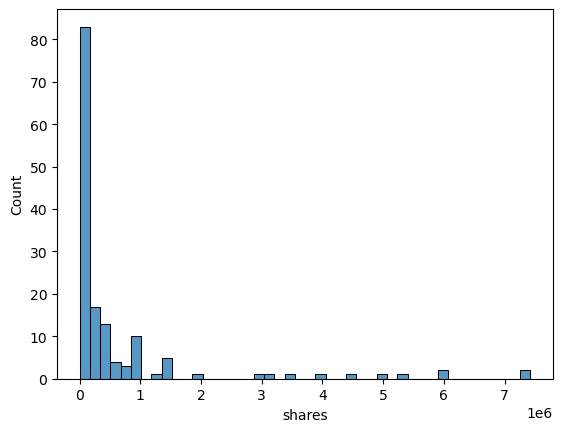

In [13]:
sns.histplot(df['shares'])

Trực quan sự thay đổi giá cổ phiếu

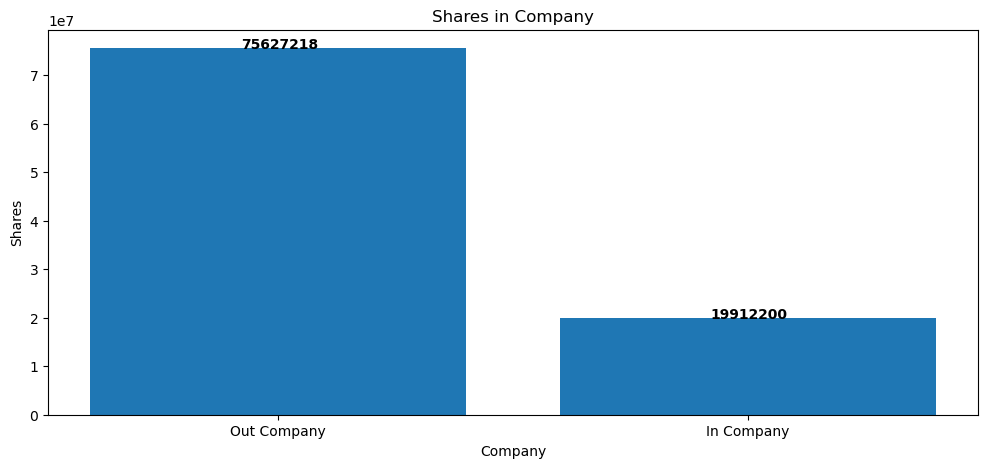

In [14]:
# Get none value in 'shareholder position' column
outCompany = df[df['shareholder position'].isna()]
# Get value not none in 'shareholder position' column
inCompany = df[df['shareholder position'].notna()]
# draw bar chart between sum of shares in none and not none value in 'shareholder position' column
plt.figure(figsize=(12,5))
plt.bar(['Out Company','In Company'],[outCompany['shares'].sum(),inCompany['shares'].sum()])

for i, v in enumerate([outCompany['shares'].sum(),inCompany['shares'].sum()]):
    plt.text(i - 0.08, v, str(v), color='black', fontweight='bold')


plt.title('Shares in Company')
plt.xlabel('Company')
plt.ylabel('Shares')
plt.show()

Trả lời câu hỏi giúp ích cho chúng ta về biết được lưu lượng cổ phiếu được phân phát như thế nào đối với người không ở trong công ty và trong công ty

Nhìn vào biểu đồ có thể thầy được lượng mua cổ phiếu của khách hàng ngoài công ty là nhiều hơn so với trong công ty